Consider adding this project to my person github repo

Remember to change the environment to quantum!

Not sure why my IBM quantum account has been disabled. Maybe should contact later about this.

Can just use "transpile" without "assemble". Transpiling just optimizes circuit for the given hardware.

# Imports

In [2]:
from qiskit import QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
f = open("api_token.txt", "r")
api_token = f.readline()
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler
from qiskit import Aer

# Tutorial

In [1]:
import qiskit_textbook
#from qiskit_textbook import games

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


Total count for 00 and 11 are: {'00': 508, '11': 492}


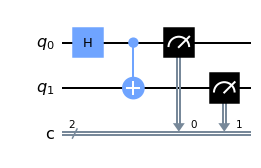

In [6]:
# Use Aer's AerSimulator
simulator = AerSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0, 1], [0, 1])

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)

# Draw the circuit
circuit.draw('mpl')

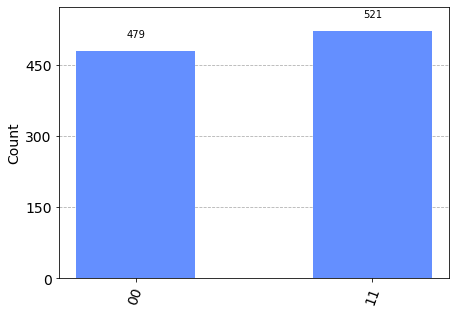

In [31]:
plot_histogram(counts)

# Circuit Basics

Creating a circuit

In [7]:
import numpy as np
from qiskit import QuantumCircuit

In [8]:
circuit = QuantumCircuit(3,3) 
# first arg is number of qubits, 2nd arg is number of classical bits (for measuring)
# by default all qubits start in state |0>

In [9]:
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0,2)

In [11]:
# Not sure why this doesn't work
circuit.measure([0,1,2],[0,1,2])

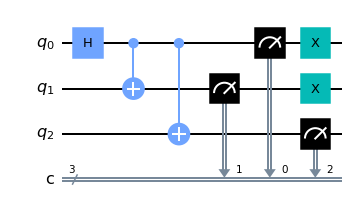

In [22]:
circuit.draw('mpl')

In [15]:
sim = AerSimulator()
job = sim.run(circuit) # a "Result" object
# default is 1024 iterations

In [20]:
job.result().get_counts()

{'111': 506, '000': 518}

In [21]:
circuit.x([1,0])

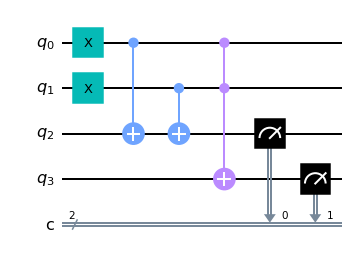

In [29]:
# Make a half adder
# CNOT is basically an XOR gate
# Toffoli is basically an AND gate
qc = QuantumCircuit(4, 2)
qc.x([0,1])
qc.cx([0,1],2)
qc.ccx(0,1,3)
qc.measure([2, 3],[0,1])
qc.draw('mpl')

In [30]:
sim = AerSimulator()
job = sim.run(qc)
res = job.result()
res.get_counts()

{'10': 1024}

In [59]:
from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
# first argument is a list of indices where the amplitude is 1, 2nd arg is dimension of the statevector
state = Statevector.from_int([0], 2**3)

In [60]:
# Evolve the state by the quantum circuit
state = state.evolve(circuit)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [61]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(state)

<IPython.core.display.Latex object>

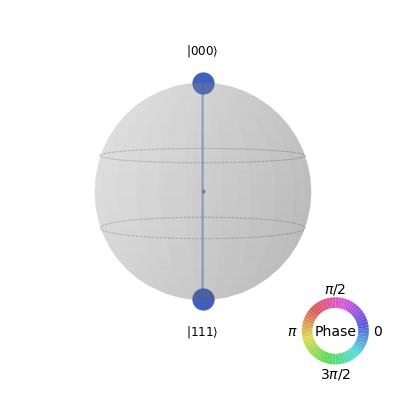

In [62]:
state.draw('qsphere')

# Intro Course

## Why quantum computers

In [3]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, [1, 2]) # this made 2 gates
qc.measure_all()

In [4]:
qc.draw()

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

Need the API key to connect with IBM to work on their quantum computer

In [10]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler
#service = QiskitRuntimeService(channel="ibm_quantum")
service = QiskitRuntimeService(channel="ibm_quantum", token=api_token)
backend = service.least_busy(simulator=False, operational=True)
print(f'Running on {backend}')

Running on <IBMBackend('ibmq_manila')>


In [11]:
with Session(backend=backend):
    sampler = Sampler()
    result = sampler.run(qc).result()

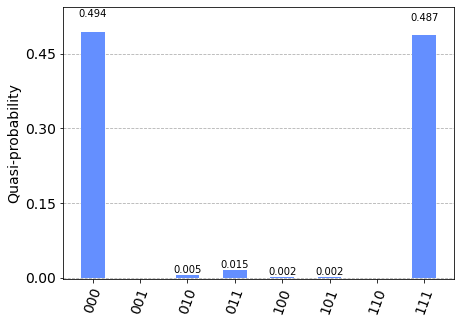

In [12]:
from qiskit.visualization import plot_histogram
distribution = result.quasi_dists[0].binary_probabilities()
plot_histogram(distribution)

## Visualizing Entanglement

In [11]:
#from qiskit_textbook.games import hello_quantum
#from qiskit_textbook.games import qiskit_game_engine


In [12]:
from hello_qiskit import run_puzzle

In [19]:
puzzle = run_puzzle(0)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xb0\x00\x00\x01\xb0\x08\x06\x00\x00\x00\xc8N0*\x…

Getting the textbook to run is weirdly hard... Going to just skip that

## Bell test for quantum variables

This explanation of the Bell test is actually a bit more confusing than the CHSH game from CMU.

Suppose 2 bits have factors that contibute to their bit value; generated by a random process (e.g. randomly chosen space and time value). Basically if a classical bit's value can be determined by one of 2 rules (e.g. space and time), then if 2 bits are strongly correlated in space they must either be

- Strongly correlated in time (if time and space aren't correlated)
- One's space is strongly correlated with another's time (if this were not the case then it wouldn't be possible for their spaces to be correlated if their times are always different)

In [7]:
from math import pi
from qiskit.quantum_info import Statevector

def initialize_program():
    qubit = QuantumRegister(2)
    A = qubit[0]
    B = qubit[1]
    
    bit = ClassicalRegister(2)
    a = bit[0]
    b = bit[1]
    
    qc = QuantumCircuit(qubit, bit)
    
    return A, B, a, b, qc

def hash2bit(variable, hash_type, bit, qc):
    if hash_type == 'H': # we'll make x measurement. If not then don't rotate and measure in z.
        qc.h(variable)
    return qc.measure(variable, bit)

For qubits this is not true though. For example in the Bell State, the qubits are super correlated in the 0/1 property, but pretty weak in the +/- quantity. Similarly one's 0/1 is pretty randomly associated with another +/-

In [198]:
# Cool way to draw the quantum state
# state = state.evolve(qc)
# state.draw('latex')

# It is actually a bit confusing to me how to get it in this kind of state. I'll have to think about it

<IPython.core.display.Latex object>

In [208]:
# If the max measurement is greater than the sum of the other measurements, Bell's inequality is violated

def bell_test(shots = 8192):
    sim = AerSimulator()
    P = {'HH':0, 'HV':0, 'VH':0, 'VV':0}
    #keys = ['HH','HV','VH','VV']
    for key in P.keys():
    # first initialize bellstate
        A, B, a, b, qc = initialize_program()
    # This is one possible circuit that initializes a state that violates the test
        qc.x(B)
        qc.ry(pi/4,B)
        qc.h(B)
        qc.h(A)
        qc.x(A)
        qc.cz(A,B)
        qc.ry(pi/4,B)
        
    # then run hash2bit
        hash2bit(A, key[0], a, qc)
        hash2bit(B, key[1], b, qc)

    # Run simluator and get counts for 8192 iterations
        counts = sim.run(qc, shots = shots).result().get_counts()
        for res in counts.keys():
            if res[0] != res[1]:
                P[key] += counts[res]/shots
    
    return (2*max(P.values())) - sum(P.values()), P

In [209]:
bell_test()

(0.2012939453125,
 {'HH': 0.14501953125,
  'HV': 0.1473388671875,
  'VH': 0.74658203125,
  'VV': 0.2529296875})

Now let's dissect how the textbook did it

In [3]:
def setup_variables(qubit1, qubit2, qc):
    """initializes the state I want to run the bell test on"""
    # This is one possible circuit that initializes a state that violates the test
    qc.x(qubit2)
    qc.ry(pi/4,qubit2)
    qc.h(qubit2)
    qc.h(qubit1)
    qc.x(qubit1)
    qc.cz(qubit1,qubit2)
    qc.ry(pi/4,qubit2)
    

In [51]:
# The "assemble" function is deprecated. Just use the transpile directly
# transpile takes in a list of Quantum Circuits and a backend. It optimizes the circuit for the device used

shots = 8192
from qiskit import transpile

def calculate_P(simulator):
    P = {}
    program = {}
    for hashes in ['VV','VH','HH','HV']:
        A, B, a, b, program[hashes] = initialize_program()
        
        setup_variables(A, B, program[hashes]) # I don't think I have access to this, but might be able to ignore
        
        hash2bit(A, hashes[0], a, program[hashes])
        hash2bit(B, hashes[1], b, program[hashes])
        
    # submit jobs
    t_qcs = transpile(list(program.values()), backend)
    #qobj = assemble(t_qcs, shots = shots)
    job = backend.run(t_qcs)
    
    # get results
    for hashes in ['VV','VH','HH','HV']:
        # Note that the same job object is used for all 4 different programs
        stats = job.result().get_counts(program[hashes]) # I guess get_counts can take in a QC as an argument..? Maybeis the qobj had multiple QCs
        
        P[hashes] = 0
        for string in stats.keys():
            a = string[-1]
            b = string[-2]
            
            if a != b:
                P[hashes] += stats[string] / shots
    return P

In [52]:
backend = Aer.get_backend('aer_simulator')
calculate_P(backend)

{'VV': 0.0328369140625,
 'VH': 0.0911865234375,
 'HH': 0.0167236328125,
 'HV': 0.018798828125}

Play around a little with the "job.results()" object and see why get counts can take in a QC as an argument

In [ ]:
P = {}
program = {}
for hashes in ['VV','VH','HH','HV']:
    A, B, a, b, program[hashes] = initialize_program()

    setup_variables(A, B, program[hashes]) # I don't think I have access to this, but might be able to ignore

    hash2bit(A, hashes[0], a, program[hashes])
    hash2bit(B, hashes[1], b, program[hashes])

In [ ]:
t_qcs = transpile(list(program.values()), backend)
#qobj = assemble(t_qcs, shots = 8192)
job = backend.run(t_qcs)

In [ ]:
stats = job.result().get_counts(program['VV'])

## Grover's Search Algorithm

Unorderd lists are hard to search. They are called unstructured.

Supposedly, solving SAT is similar to searching

### Guided

In [3]:
# Example of a SAT problem

with open('3sat.dimacs', 'r', encoding='utf8') as f:
    dimacs = f.read()
print(dimacs)

c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0


The below code draws a circuit that evaluates whether a given assignment satisfies the boolean expression. The input is the assignment and the output is the either the same as the input (if False) or the input phase shifted by -1 (if True).

In [6]:
# Code doesn't work locally
# from qiskit.circuit.library import PhaseOracle
# oracle = PhaseOracle.from_dimacs_file('3sat.dimacs')
# oracle.draw()

ModuleNotFoundError: No module named 'tweedledum'

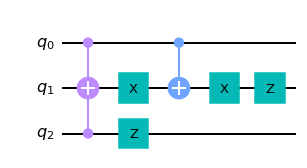

In [31]:
from qiskit import QuantumCircuit
# alternate way 
oracle = QuantumCircuit(3)
oracle.toffoli(0, 2, 1)
oracle.x(1)
oracle.z(2)
oracle.cx(0, 1)
oracle.x(1)
oracle.z(1)
oracle.draw('mpl')

Grover's algorithm attempted to find all assignments such that the circuit shifts the phase (searching for assignment in SAT).

Main Idea (Rotate, compute, rotate):
- Create uniform superposition
- Run through Circuit (Oracle)
- Run through diffuser which is the same for any oracle
- Repeat step 2 and 3 a few times
- Measure

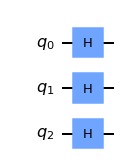

In [19]:
init = QuantumCircuit(3)
init.h([0,1,2])
init.draw('mpl')

In [20]:
# steps 2 and 3 of alg. It builds in the diffuser
from qiskit.circuit.library import GroverOperator
grover_operator = GroverOperator(oracle)

In [24]:
qc = init.compose(grover_operator)
qc.measure_all()
qc.draw()

┌───┐┌────┐ ░ ┌─┐      
   q_0: ┤ H ├┤0   ├─░─┤M├──────
        ├───┤│    │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 Q ├─░──╫─┤M├───
        ├───┤│    │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2   ├─░──╫──╫─┤M├
        └───┘└────┘ ░  ║  ║ └╥┘
meas: 3/═══════════════╩══╩══╩═
                       0  1  2

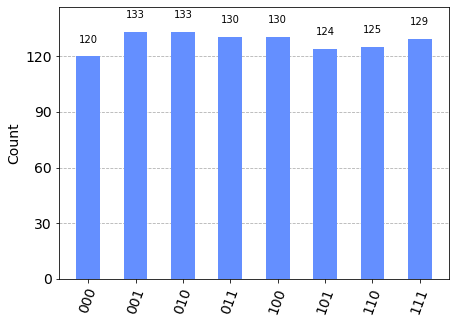

In [32]:
# Simulate the circuit
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()

# plot the results
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# This works, but you need to build the correct orcale

### Solo 

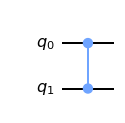

In [33]:
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
oracle.draw('mpl')

In [22]:
# Shows matrix representation of a given circuit
def display_unitary(qc, prefix=""):
    """Simulates a simple circuit and display its matrix representation.
    Args:
        qc (QuantumCircuit): The circuit to compile to a unitary matrix
        prefix (str): Optional LaTeX to be displayed before the matrix
    Returns:
        None (displays matrix as side effect)
    """
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    # Next, we'll create a copy of the circuit and work on
    # that so we don't change anything as a side effect
    qc = qc.copy()
    # Tell the simulator to save the unitary matrix of this circuit
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))

In [ ]:
display_unitary(oracle, "U_\\text{oracle}=")

In [23]:
# Exercise -- Create a circuit that flips the 00 state instead of 11
oracle_00 = QuantumCircuit(2)
oracle_00.x([0,1])
oracle_00.cz(0,1)
oracle_00.x([0,1])

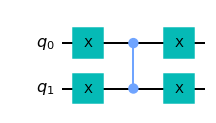

In [25]:
oracle_00.draw('mpl')

In [24]:
display_unitary(oracle_00)

<IPython.core.display.Latex object>

The cz gate essentially reflects around the 11 state (makes this coordinate negative). The goal is to instead reflect across the 's' state (uniform superposition). To do this, simply transform s into 11, use cz to reflect, then transform back from 11 to s. It seems a little weird, but it works because the cz gate only affects the 11 state and leaves all other states the same, so except for the s state, nothing would get flipped (so transform --> reverse ends up just being the trivial circuit).

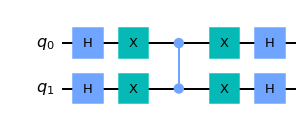

In [46]:
diffuser = QuantumCircuit(2)
diffuser.h([0,1])
diffuser.x([0,1])
diffuser.cz(0,1)
diffuser.x([0,1])
diffuser.h([0,1])
diffuser.draw('mpl')

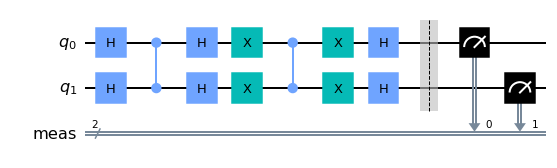

In [47]:
grover = QuantumCircuit(2)
grover.h([0,1])
grover = grover.compose(oracle)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw('mpl')

In [48]:
from qiskit import Aer
sim = Aer.get_backend('aer_simulator')
sim.run(grover).result().get_counts()

{'11': 1024}

## Project

Create a function that takes a binary string and creates the oracle for that string (inverting that string and no other)

In [ ]:
def create_oracle(binary_string):
    # TODO

In [19]:
oracle_111 = QuantumCircuit(5)
oracle_111.x(4)
oracle_111.cswap(0,1,3)
oracle_111.cz(2,3)
oracle_111.cswap(1,3,4)
oracle_111.swap(1,2)
#oracle_111.measure_all()

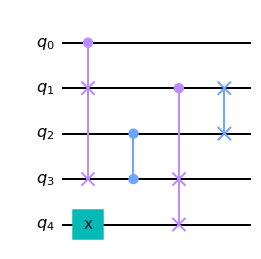

In [20]:
oracle_111.draw('mpl')

In [26]:
display_unitary(oracle_111)

<IPython.core.display.Latex object>

NoneType

In [28]:
from qiskit import Aer
from qiskit.visualization import array_to_latex
sim = Aer.get_backend('aer_simulator')
# Next, we'll create a copy of the circuit and work on
# that so we don't change anything as a side effect
oracle = oracle_111.copy()
# Tell the simulator to save the unitary matrix of this circuit
oracle.save_unitary()
oracle = sim.run(oracle).result().get_unitary()

#display(array_to_latex(unitary, prefix=prefix))

In [40]:
oracle[25]

/var/folders/06/kt3wlz1x285bzg98r_byq_480000gn/T/ipykernel_35028/2611161609.py:1: DeprecationWarning: The return type of saved unitaries has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Operator` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  oracle[25]


array([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [42]:
for i in range(len(oracle)):
    print(oracle[i])

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.

/var/folders/06/kt3wlz1x285bzg98r_byq_480000gn/T/ipykernel_35028/2564620548.py:1: DeprecationWarning: The return type of saved unitaries has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Operator` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i in range(len(oracle)):
/var/folders/06/kt3wlz1x285bzg98r_byq_480000gn/T/ipykernel_35028/2564620548.py:2: DeprecationWarning: The return type of saved unitaries has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Operator` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  print(oracle[i])


# Basics of Quantum Info Course

In [2]:
from qiskit.quantum_info import Statevector
from numpy import sqrt
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from numpy import sqrt

## State Vectors

Defining statevectors

In [3]:
u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1+2.j)/3, -2/3])
w = Statevector([1/3, 2/3])

In [4]:
u

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [5]:
display(u.draw('latex'))

<IPython.core.display.Latex object>

In [6]:
display(v.draw('text'))

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [8]:
# it allows you to create states that aren't normalized
p = Statevector([1, 1])

# but you can check to see if the norm is 1
display(p.is_valid())

Making a measurement

In [18]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

{'0': 540, '1': 460}

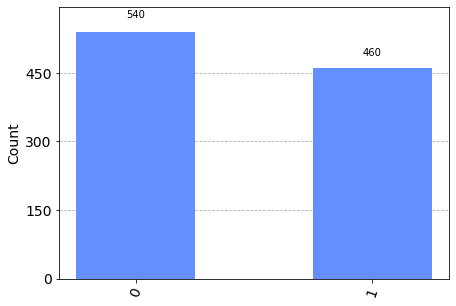

In [27]:
statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

In [28]:
v.sample_counts(1000)['0']

529

In [43]:
# Each list in the operator is a row. It is written in row order.

X = Operator([ [0,1],[1,0] ])
Y = Operator([ [0,-1.j],[1.j,0] ])
Z = Operator([ [1,0],[0,-1] ])
H = Operator([ [1/sqrt(2),1/sqrt(2)],[1/sqrt(2),-1/sqrt(2)] ])
S = Operator([ [1,0],[0,1.j] ])
T = Operator([ [1,0],[0,(1+1.j)/sqrt(2)] ])

In [60]:
v = Statevector([1, 0])

In [61]:
# have to actually assign the output of the evolve function to a variable
v = v.evolve(H)
v.draw('latex')

<IPython.core.display.Latex object>

In [54]:
V = V.evolve(H)
#stats = V.sample_counts(1024)

In [56]:
V.draw('latex')

<IPython.core.display.Latex object>

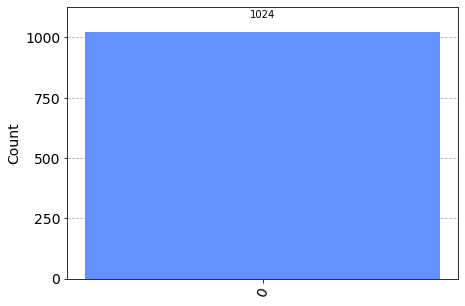

In [38]:
plot_histogram(stats)

## Multiple qubits

The Operator class creates matrices

In [2]:
# creates the (0,1) ket
zero, one = Statevector.from_label('0'), Statevector.from_label('1')
zero.tensor(one)

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [8]:
plus = Statevector.from_label('+')
i_state = Statevector([1/sqrt(2), 1j/sqrt(2)])
psi = plus.tensor(i_state)

In [9]:
X = Operator([ [0, 1],
              [1, 0] ])
I = Operator([ [1, 0],
              [0, 1] ])
X.tensor(I)

Operator([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [10]:
psi.evolve(I ^ X)

Statevector([0. +0.5j, 0.5+0.j , 0. +0.5j, 0.5+0.j ],
            dims=(2, 2))


In [22]:
# Challenge: Try to create the bell state
zero = Statevector.from_label('0')
state = zero.tensor(zero)
hadamar = Operator([ [1/sqrt(2), 1/sqrt(2)],
                    [1/sqrt(2), -1/sqrt(2)]])
identity = Operator([ [1, 0], 
                     [0, 1] ])

had_id = hadamar.tensor(identity)

#state = state.evolve(had_id)

CNOT = Operator([ [1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0] ])

bell_transform = had_id.compose(CNOT)

state = state.evolve(bell_transform)

In [25]:
state.draw('latex')

<IPython.core.display.Latex object>

In [26]:
W = Statevector([0, 1, 1, 0, 1, 0, 0, 0]/sqrt(3))
W.draw('latex')

<IPython.core.display.Latex object>

You can choose to measure just one of the qubits

In [30]:
result, new_sv = W.measure([0]) # pass in a list of indices you want measured
print(f'Measured: {result} \nState after measurement:')
new_sv.draw('latex')

Measured: 0 
State after measurement:


<IPython.core.display.Latex object>

## Quantum Circuits 

In [63]:
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [65]:
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw('latex')

<IPython.core.display.Latex object>

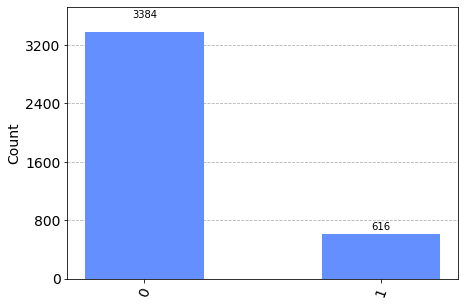

In [66]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)

You can name your qubit using a quantum register

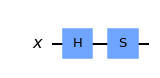

In [5]:
from qiskit import QuantumRegister
X = QuantumRegister(1, "x")
circuit = QuantumCircuit(X)


circuit.h(X)
circuit.s(X)
circuit.draw('mpl')


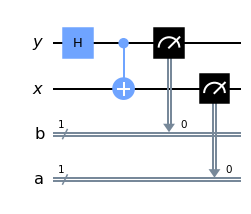

In [8]:
# More complex example

X = QuantumRegister(1, "x")
Y = QuantumRegister(1, "y")
A = ClassicalRegister(1, "a")
B = ClassicalRegister(1, "b")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)
circuit.draw('mpl')

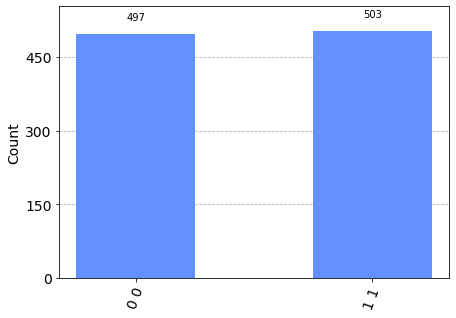

In [9]:
simulator = AerSimulator()
simulation = simulator.run(transpile(circuit, simulator), shots=1000)
stats = simulation.result().get_counts()
plot_histogram(stats)

## Entanglement in Action

### Teleportation

Below is a pretty compliated circuit that teleports the contents of Q into B

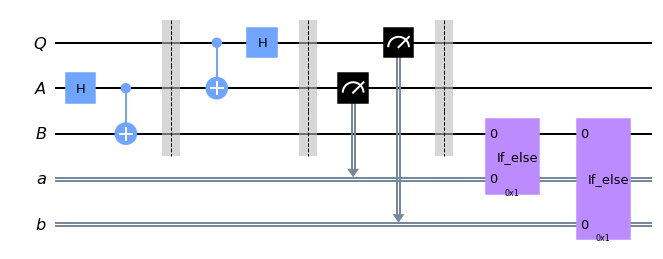

In [5]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")
qubit = QuantumRegister(1, "Q")

qc = QuantumCircuit(qubit, ebit0, ebit1, a, b)


#prepare ebit
qc.h(ebit0)
qc.cx(ebit0, ebit1)
qc.barrier()

# Alice
qc.cx(qubit, ebit0)
qc.h(qubit)
qc.barrier()


# Classical bits
qc.measure(ebit0, a)
qc.measure(qubit, b)
qc.barrier()

with qc.if_test((a, 1)):
    qc.z(ebit1)
with qc.if_test((b, 1)):
    qc.x(ebit1)

qc.draw('mpl')

Below shows how to compose circuits together to include an auxiliary qubit just in case Q is entangled with R

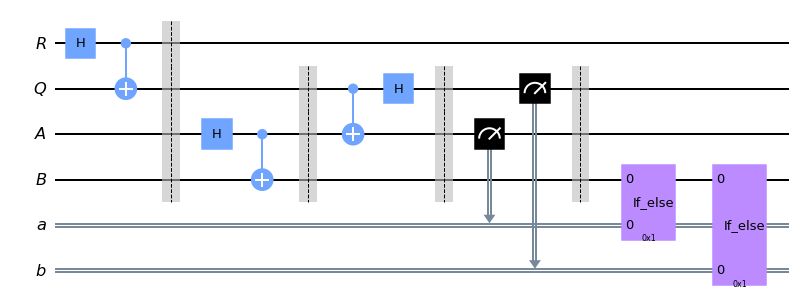

In [7]:
aux = QuantumRegister(1, "R")
test = QuantumCircuit(aux, qubit, ebit0, ebit1, a, b)
test.h(aux)
test.cx(aux, qubit)
test.barrier()

test = test.compose(qc, qubits = [1,2,3]) # qubits=[1,2,3] tells the composition to skip qubit R
test.draw('mpl')

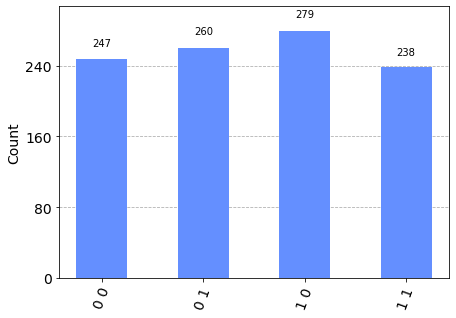

In [11]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
# Result counts always show you the classical bits
# the bottom most register appearing on the left side of the bit string

counts = AerSimulator().run(test).result().get_counts()
plot_histogram(counts)

In [13]:
# interesting dictionary structure that could be useful
counts.items()

dict_items([('0 1', 260), ('1 1', 238), ('0 0', 247), ('1 0', 279)])

### Superdense coding

Superdense coding is a more intuitive (and less magical) idea than teleportation. Essentially you can send 2 classical bits of info by burning 1 ebit (and sending the other half of the ebit).

Essentially you put the EPR pair into 1 of 4 states and then your partner measures it.

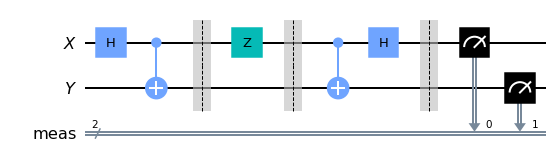

In [17]:
# Can change this
bit0 = "1"
bit1 = "0"

ebit0 = QuantumRegister(1, "X")
ebit1 = QuantumRegister(1, "Y")

protocol = QuantumCircuit(ebit0, ebit1)

# set up EPR pair
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

if bit0 == "1":
    protocol.z(0)
if bit1 == "1":
    protocol.x(0)
protocol.barrier()

protocol.cx(0, 1)
protocol.h(0)

protocol.measure_all()

protocol.draw('mpl')

In [18]:
counts = AerSimulator().run(protocol).result().get_counts()

In [19]:
counts.items()

dict_items([('01', 1024)])

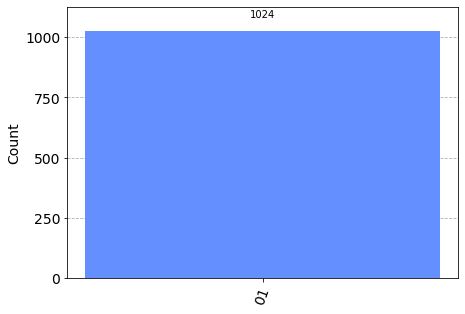

In [21]:
plot_histogram(counts)

In [22]:
# Potential Exercise: Use another qubit as a random bit generator (using hadamars and measures) 
# to randomly select the 2 classical bit message

### CHSH Game

Non-local games have the structure where some ref asks a pair of questions (x,y) to separated individuals, and the individuals each give an answer so the pair gives (a,b). The individuals win the game if (a,b) is a solution for (x, y). The game below is one such game where the solutions for (x,y) are described.

In [2]:
from numpy.random import randint

def chsh_game(strategy):
    """Plays the CHSH game
    Args:
        strategy (callable): A function that takes two bits (as `int`s) and
            returns two bits (also as `int`s). The strategy must follow the
            rules of the CHSH game.
    Returns:
        int: 1 for a win, 0 for a loss.
    """
    # Referee chooses x and y randomly
    x, y = randint(0, 2), randint(0, 2)

    # Use strategy to choose a and b
    a, b = strategy(x, y)

    # Referee decides if Alice and Bob win or lose
    if (a != b) == (x & y):
        return 1  # Win
    return 0  # Lose

In [4]:
from qiskit import QuantumCircuit
from numpy import pi

In [9]:
def chsh_circuit(x, y):
    
    # just making the EPR pair
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()
    
    #Alice
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-pi / 2, 0)
    qc.measure(0, 0)
    
    
    #Bob
    if x == 0:
        qc.ry(-pi/4, 1)
    else:
        qc.ry(pi/4, 1)
    qc.measure
    
    return qc
    

In [10]:
qc = chsh_circuit(1, 1)

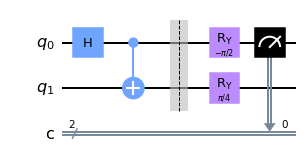

In [11]:
qc.draw('mpl')

In [12]:
from qiskit_aer import AerSimulator

simulator = AerSimulator()

def quantum_strategy(x, y):
    
    job = simulator.run(chsh_circuit(x, y), shots=1, memory=True) # memory seems to be a place to store results?
    result = job.result().get_memory()[0]
    a, b = result[0], result[1]
    return a, b

In [13]:
NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(quantum_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.49


# Quantum Query Algorithms Course

In the query model, we are trying to figure out information about a function. This function can sometimes be thought of as a string (where the alphabet can potentially be very large like "COLORS"), indexed by all possible inputs of the function (a bit confusing, but makes sense).

When thought of in the "String" case, ew can think of the problem as cmoputing
- OR (binary alphabet)
- Parity/XOR (binary alphabet)
- Minimum (alphabet is m-bit binary strings; so 2^m elements)

## Deutsch's Algorithm 

Deutsch's problem is simply to find the partiy of an unknown function that takes in 1 bit and spits out 1 bit. There are only 4 such possible functions

- f(0) = f(1) = 0
- f(0) = 0, f(1) = 1
- f(0) = 1, f(1) = 0
- f(0) = f(1) = 1

These can be thought of as the 4 strings (00, 01, 10, 11)

Classically you'd need 2 queries to solvet his problem

The Deutsch and DJ algorithms are the simplest in that all they require is for you to bookend your input qubits with hadamars and measure. The subtlety is that you have 
to use the sign implementation by letting the output qubit be ket-minus. You also have to OR the resultant input qubits.

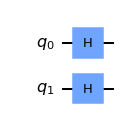

In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h([1,0])
qc.draw('mpl')

# unable to draw placeholder function..

The book remarks on an interesting phenomenon known as "phase kickback" where the input bit gets changed instead of the output bit (in the Qf circuit). This occurs when then output bit is an eigen vector? Not completely clear to me yet.

In [3]:
# Ignore the logic and focus on syntax for now
def deutsch_function(case: int):
    """
    Generate a valid Deutsch function as a 'QuantumCircuit'.
    """
    if case not in [1,2,3,4]:
        raise ValueError("`case` must be 1,2,3, or 4.")
    
    f = QuantumCircuit(2)
    if case in [2,3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

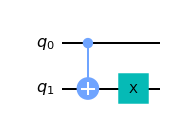

In [5]:
deutsch_function(3).draw('mpl')

In [7]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in Deutsch's algorithm
    """
    n = function.num_qubits-1
    qc = QuantumCircuit(n+1, n)
    
    qc.x(n)
    qc.h(range(n+1)) # lets you put an H gate on all qubits
    
    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()
    
    qc.h(range(n))
    qc.measure(range(n), range(n))
    
    return qc

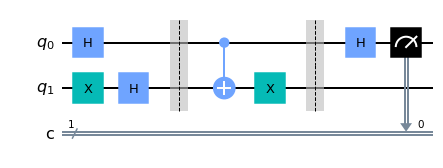

In [10]:
compile_circuit(deutsch_function(3)).draw('mpl')

In [12]:
# Remember that in the Quantum Algorithm way, '0' is balanced
def deutsch_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch function is constant or balanced.
    """
    qc = compile_circuit(function)
    result = AerSimulator().run(qc, shots=1,memory=True).result()
    measurements = result.get_memory()
    
    if measurements[0] == '0':
        return "constant"
    return "balanced"

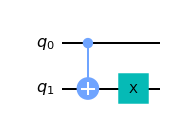

'balanced'

In [14]:
f = deutsch_function(3)
display(f.draw('mpl'))
deutsch_algorithm(f)

The Deutsch Algorithm has a 1 vs 2 advantage, but the Deutsch Jozsa algorithm can do even better. As before it has a single output register (that is initialized to the minus ket before being fed into the function - similar to the sign implementation of functions). However now it has an arbitrary number input bits so we are querying a much longer string.

Again it is the input bits that are measured at the end, not the output register.

The Deutsch-Jozsa problem is a "partial" function in that it only cares about functions (strings) that are either balanced or constant (the goal is to figure out which) -- other functions are "don't care" inputs.

The algorithm solves this with a single query using a uniform superposition input. If a single measured bit is 1 then the function is balanced, otherwise the function is constant (so there is a post-processing OR calculation).

This algorithm is the same as the Bernstein-Vazirani (XOR), but just with a different promise

In [7]:
# create random promise function
import numpy as np

def dj_function(num_qubits):
    """
    Creates a random Deutsch-Jozsa function
    """
    
    qc = QuantumCircuit(num_qubits + 1)
    if np.random.randint(0, 2): # flip output bit randomly half of the time
        qc.x(num_qubits)
    if np.random.randint(0,2):
        return qc # this returns a constant circuit (either constantly 1 or constantly 0)
    
    # if you make it here you are trying to make the balanced function
    on_states = np.random.choice(range(2**num_qubits), 2**num_qubits//2, replace=False)
    
    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == '1':
                qc.x(qubit)
        return qc
    
    for state in on_states:
        qc.barrier()
        qc = add_cx(qc, f"{state:0b}") # write state in binary!
        qc.mct(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")
    
    qc.barrier()
    
    return qc
    
    
        

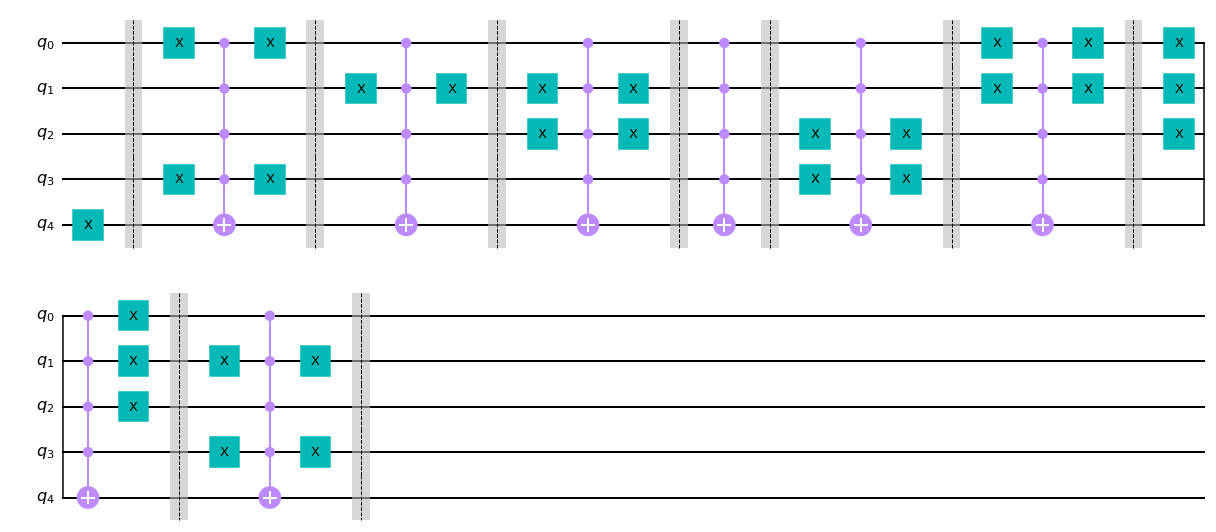

In [32]:
func = dj_function(4)
func.draw('mpl')

In [4]:
# This function takes in a "Function" that is either balanced or constant and build the DJ circuit around it
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa algorithm.
    """
    n = function.num_qubits-1
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    qc.h(range(n+1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [5]:
def dj_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch-Jozsa function is constant or balanced.
    """
    qc = compile_circuit(function)
    
    result = AerSimulator().run(qc,shots=1,memory=True).result()
    measurements = result.get_memory()
    if '1' in measurements[0]:
        return 'balanced'
    return 'constant'

In [8]:
qc = compile_circuit(dj_function(1))

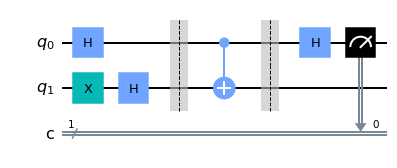

In [10]:
qc.draw('mpl')

## Bernstein-Vazirani problem

I found the BV problem more clear when I read it in the Qiskit textbook. The bottom-line is that the "secret" function f(x) is the binrary dot product of s and x (where s is some constant) and the goal is to find s. Interestingly the same algorithm as DJ solves this problem (but doesn't OR the resultant input).

By the way, the above is equivalent to an XOR between the bits of x "indicated" by s.

# Qiskit Documentation

In [27]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.random import random_circuit

## Quantum Circuit

Making conditional gates with c_if

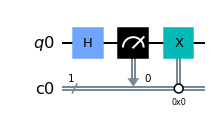

In [22]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)
qc.h(0)
qc.measure(0, 0)

qc.x(0).c_if(cr, 0)
qc.draw('mpl')

Getting properties of the circuit

In [24]:
qc = QuantumCircuit(12)
for idx in range(5):
    qc.h(idx)
    qc.cx(idx, idx+5)
qc.cx(1, 7)
qc.x(8)
qc.cx(1, 9)
qc.x(7)
qc.cx(1, 11)
qc.swap(6, 11)
qc.swap(6, 9)
qc.swap(6, 10)
qc.x(6)

qc.width() # qubits AND classical bits
qc.num_qubits
qc.count_ops() # value counts of different gates
qc.size() # sum of value counts
qc.depth()


OrderedDict([('cx', 8), ('h', 5), ('x', 3), ('swap', 3)])

Draw a random circuit! Could be useful

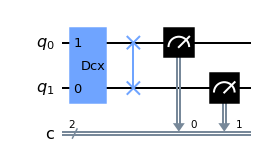

In [29]:
qc = random_circuit(2, 2, measure=True)
qc.draw('mpl')

## Quantum/Classical Register

Takes in a size, names, and specific bits (all optional). It is basically just a named set of qubits/bits that you can put into a circuit.